# Movie Industry Analysis

Authors: Cayke Felipe dos Anjos, Dolgor Purbueva

## Overview

This project analyzes past movies data to offer strategic business recommendations for a new film studio. We aim to predict the most profitable strategies for film production and release by examining production budgets, gross revenues, net profits, genres, popularity, key staff and release timelines. As result this project provides three business recommendations: what genre should a future movie be, what budget to allocate and when to release it.

<img src="images/screen.png" alt="Alt text" width="1000"/>

## Business Problem

The company is expanding its portfolio by investing in a new film studio. Launching a film studio in today's competitive entertainment industry requires a solid understanding of what drives movie success and attracts audiences. The movie industry is known for its substantial risks and high capital demands. Recent developments in AI have made video content creation faster and more efficient, increasing competition but also opening up new opportunities to enter the market.

Our project aims to analyze various datasets, including past movies' financial results, genre correlations, and movie ratings and popularity. By using data analysis techniques, we seek to gain valuable insights and identify patterns that can help shape the company's film production strategy. The goal is to provide three concrete business recommendations that maximize profitability and lower business risks, ensuring a strong entry into the market.

Some of the questions we tried to answer with analysis:

* How should the movie be budgeted?
* What genres are most profitable?
* What genres are most popular?
* When should a movie be released?

## Data Understanding

We used datasets from Rotten Tomatoes, TheMovieDB, Bom Office Mojo, IMDB and The Numbers. Each dataset is of different size and contains different data catecories which might be seen as a limitation. For every question we answer we choose the most relevant dataset or merge some of them together for a fuller picture.

For budget related analysis we used IMDB and The Numbers. TheMovieDD dataset was used to explore movie ratings and popularity. IMDB was also used to determine most popular directors for each genre.

* One of the main metrics we explored is genre. [IMDB defines](https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG?ref_=helpms_h#) genre as a category of artistic composition, characterized by similarities in form, style, or subject matter for a piece of content. [Reaserch by Mustafa Mahmoud Yousry](https://offscreen.com/view/going_to_the_movies) has shown that genre is the main decision factor for audience when chosing a movie to watch.

<img src="images/genre.png" alt="Alt text" width="400"/>

* We introduced the Return on Investment (ROI) metric as a standardized criterion to measure the financial success of a movie relative to its investments, as well as calculated movie net profit.

* We also explored [popularity criteria in TheMovieDB dataset](https://developer.themoviedb.org/docs/popularity-and-trending), as well as average vote (rating).


<img src="images/screen1.png" alt="Alt text" width="800"/>

<img src="images/movie_data_erd.jpeg" alt="Alt text" width="400"/>

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#function for cleaning columns and coverting to integer

def clean_and_convert_to_int(column):
    return column.replace({'\$': '', ',': ''}, regex=True).astype(int)

#function for converting to date type

def convert_to_date(column):
    return pd.to_datetime(column, errors='coerce')

#function to clean object columns

def clean_object(column):
    return column.strip().lower()

def split(column):
    return column.str.split(',')

### The Numbers DF - Gross and ROI

5782 rows with no Null values

convert all money columns into integer
convert release date to date type

i noticed that ID column is not a unique values, all ID numbers repeat 58 or 57 times. the system doesnt make sense, so we delete id column

we calculate ROI in a new column. 
some of the budget and gross values had 0 values. so we drop them using ROI column and lose 367 rows

**Result: 3611 rows × 6 columns. Movies with positive ROI**

In [3]:
#cleaning The Numbers DF

tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn[['production_budget', 'domestic_gross', 'worldwide_gross']] = tn[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(clean_and_convert_to_int)

tn[['release_date']] = tn[['release_date']].apply(convert_to_date)

tn['release_year'] = tn['release_date'].dt.year

tn = tn.drop(columns=['id'])

tn['worldwide_net'] = tn['worldwide_gross'] - tn['production_budget']

tn['ROI'] = (tn['worldwide_net']) / tn['production_budget'] * 100

tn = tn[(tn['domestic_gross'] != 0) & (tn['worldwide_gross'] != 0)]

tn = tn[(tn['ROI'] != 0) & (tn['ROI'] != np.inf) & (tn['ROI'] != -np.inf) & (tn['ROI'] != -100)]

tn = tn.sort_values(by='ROI')

tn

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,worldwide_net,ROI
4081,2010-05-21,Perrierâs Bounty,6600000,828,828,2010,-6599172,-99.987455
3818,2015-05-08,Skin Trade,9000000,1242,1242,2015,-8998758,-99.986200
2152,1997-08-24,The Grimm Brothers' Snow White,26000000,5000,5000,1997,-25995000,-99.980769
5027,1993-01-01,Ed and his Dead Mother,1800000,673,673,1993,-1799327,-99.962611
1242,2013-11-01,Mr. Nobody,46500000,3622,22254,2013,-46477746,-99.952142
...,...,...,...,...,...,...,...,...
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,1999,247700000,41283.333333
5679,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000
5492,2009-09-25,Paranormal Activity,450000,107918810,194183034,2009,193733034,43051.785333
5613,1980-03-21,Mad Max,200000,8750000,99750000,1980,99550000,49775.000000


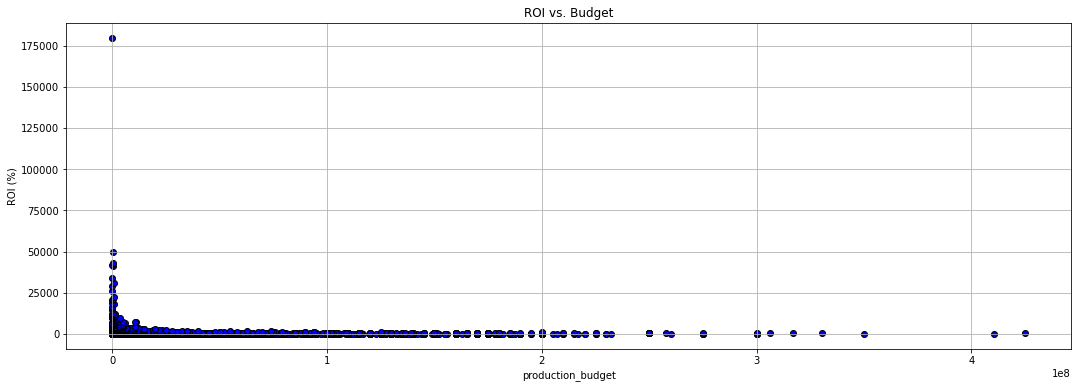

In [4]:
plt.figure(figsize=(18, 6))
plt.scatter(tn['production_budget'], tn['ROI'], color='blue', edgecolors='black')
plt.title('ROI vs. Budget')
plt.xlabel('production_budget')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()

In [5]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [6]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')


In [7]:
rt_review = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


### IMDB DB

We decided to take region, language and genre info from IMDB db

first we filter by language = en

when trying to filter by region, we see that majority has XWW region (around 18k). so this filtering is irrelevant

I see a lot of confusion between three title columns - primary_title, original_title, title. we stick with primary title

we drop all unnecessary columns and group rows by movie id to avoid duplicates

In [8]:
import sqlite3
import pandas as pd
import zipfile
import os

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    os.makedirs("temp", exist_ok=True)
    zip_ref.extractall('temp')

conn = sqlite3.connect("temp/im.db")

imdb = pd.read_sql(
    """
    SELECT  primary_title AS movie, 
            start_year, 
            runtime_minutes, 
            genres
    FROM movie_basics
    GROUP BY movie_id
    
    """
, conn
)


### Merged IMDB and TN

In [9]:
merged_df = pd.merge(tn, imdb, on='movie', how='inner')
merged_df.sort_values(by='ROI', ascending=False).reset_index(drop=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,worldwide_net,ROI,start_year,runtime_minutes,genres
0,2015-07-10,The Gallows,100000,22764410,41656474,2015,41556474,41556.474000,2015,81.0,"Horror,Mystery,Thriller"
1,1942-08-13,Bambi,858000,102797000,268000000,1942,267142000,31135.431235,2013,58.0,"Biography,Documentary"
2,1968-10-01,Night of the Living Dead,114000,12087064,30087064,1968,29973064,26292.161404,2014,79.0,Horror
3,1976-11-21,Rocky,1000000,117235147,225000000,1976,224000000,22400.000000,2019,NaN,"Action,Drama,Romance"
4,1976-11-21,Rocky,1000000,117235147,225000000,1976,224000000,22400.000000,2013,136.0,"Action,Comedy,Drama"
...,...,...,...,...,...,...,...,...,...,...,...
3272,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2020,NaN,Drama
3273,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2017,91.0,"Action,Sci-Fi"
3274,1999-10-22,Molly,21000000,17396,17396,1999,-20982604,-99.917162,2017,128.0,"Biography,Documentary,Family"
3275,2015-05-08,Skin Trade,9000000,1242,1242,2015,-8998758,-99.986200,2014,96.0,"Action,Crime,Thriller"


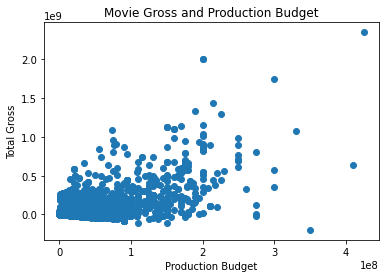

In [10]:
fig, ax = plt.subplots()

ax.set_title('Movie Gross and Production Budget')
ax.set_ylabel('Total Gross')
ax.set_xlabel('Production Budget')

y1 = merged_df.worldwide_net
x1 = merged_df.production_budget

plt.scatter(x1,y1);

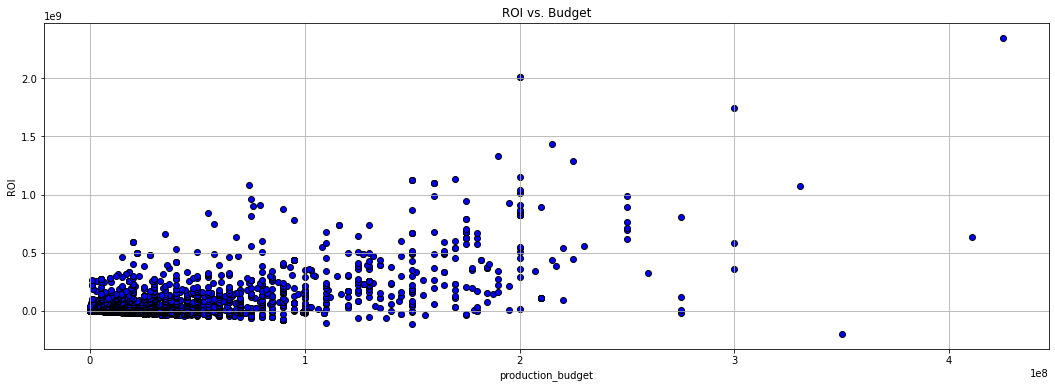

In [11]:
plt.figure(figsize=(18, 6))
plt.scatter(merged_df['production_budget'], merged_df['worldwide_net'], color='blue', edgecolors='black')
plt.title('ROI vs. Budget')
plt.xlabel('production_budget')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

In [12]:
# Correlation between Gross and Budget

column_1 = merged_df["worldwide_net"]
column_2 = merged_df["production_budget"]

correlation = column_1.corr(column_2)
print(f'Correlation between Net Profit and Budget is {correlation.round(2)}')

Correlation between Net Profit and Budget is 0.63


Text(0.5, 1.0, 'Linear Regression of Production Budget Compared to Net Profit')

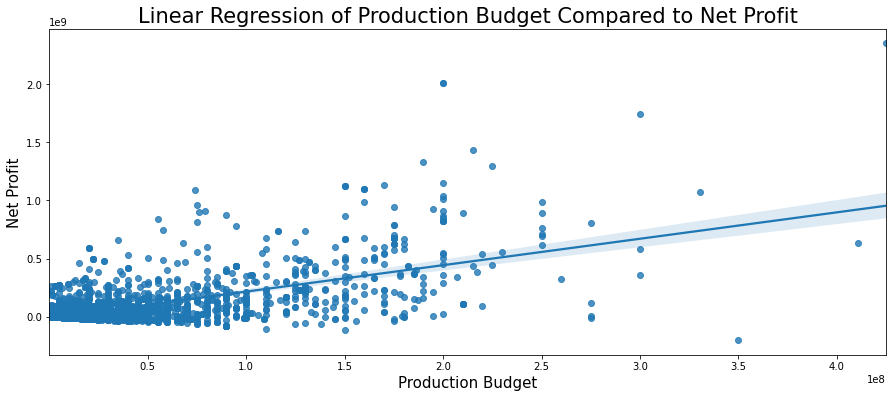

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
sns.regplot(data=merged_df, x="production_budget", y="worldwide_net")
ax.set_ylabel('Net Profit', fontsize=15)
ax.set_xlabel('Production Budget', fontsize=15)
ax.set_title('Linear Regression of Production Budget Compared to Net Profit', fontsize = 21)

In [14]:
merged_df['genres'] = merged_df['genres'].str.split(',')
merged_df_exploded = merged_df.explode('genres')
merged_df_exploded['genres'].value_counts()

Drama          1585
Comedy          741
Action          622
Thriller        492
Adventure       439
Documentary     422
Crime           340
Romance         322
Horror          321
Biography       225
Mystery         211
Sci-Fi          198
Fantasy         184
Family          178
Animation       134
History          86
Music            77
Sport            69
War              47
Musical          31
Western          21
News              7
Name: genres, dtype: int64

In [15]:
median = merged_df_exploded.groupby('genres')['ROI'].median().reset_index()
median

,genres,ROI
0,Action,109.847075
1,Adventure,161.124261
2,Animation,199.854564
3,Biography,74.016666
4,Comedy,119.199703
5,Crime,53.753771
6,Documentary,55.890618
7,Drama,61.102523
8,Family,116.706643
9,Fantasy,126.830094


In [16]:
median = median.sort_values(by='ROI', ascending=False).reset_index(drop=True)
median

,genres,ROI
0,Musical,323.950800
1,Animation,199.854564
2,Horror,162.551316
3,Adventure,161.124261
4,Mystery,147.566740
5,Sci-Fi,145.944250
6,Music,128.700183
7,Fantasy,126.830094
8,Comedy,119.199703
9,Family,116.706643


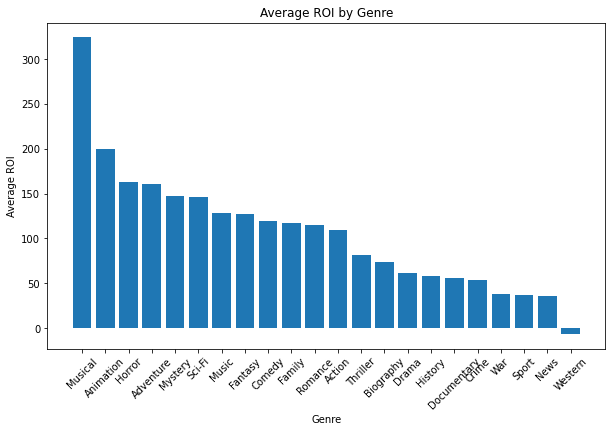

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(median['genres'], median['ROI'])
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)
plt.show()

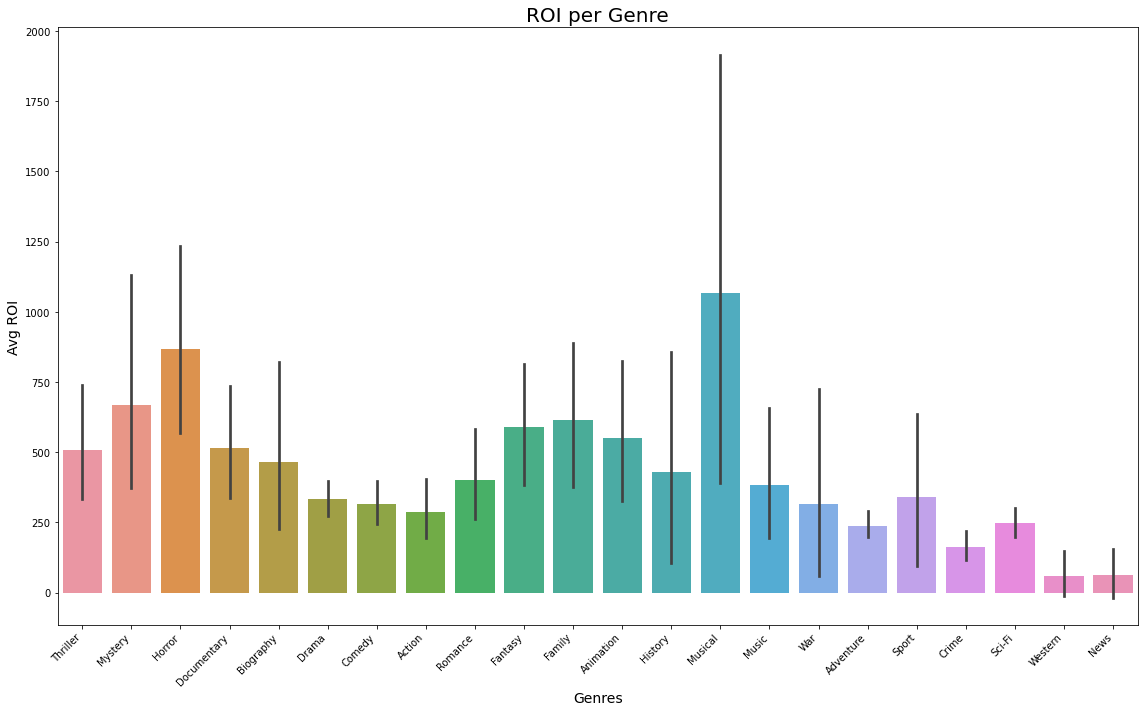

In [18]:
merged_df_exploded = merged_df_exploded.sort_values(by='ROI', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = 'genres', y = 'ROI', data = merged_df_exploded,  ax = ax)
ax.set_title('ROI per Genre', fontsize=20)
ax.set_ylabel('Avg ROI', fontsize=14)
ax.set_xlabel('Genres', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()
plt.show()

# Popularity and Ratings by Genre

To answer the next question, we need to analyze TheMovieDB dataset, which contains 10 columns and 26,517 rows. Our focus will be on the following columns: movie title, genre, vote_average, popularity, and release date.

Both Rating (vote_average) and Popularity are criteria that reflect audience approval of a particular movie. We need to examine both metrics to determine if they represent a movie's success and can be used to predict the success of future films.

In [19]:
# reading data file
movie_db = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_db.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We imported dataset into pandas df and now we need to clean it. 

We see that the genre column contains string value with genre id numbers in square brackets. We can not do any statistical analysis with this format. 

In order to decode genre ids into genre names, we used [dictionary from TheMovieDB](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee). 

Other steps of cleaning are dropping NaN values, deleting non relevant columns. 

We also extract release month into a separate column for further analysis.

In [20]:
# cleaning string value
movie_db['genre_ids'] = movie_db['genre_ids'].replace({'\[': '', '\]': ''}, regex=True)

# splitting the string into a list of string 
movie_db['genre_ids'] = movie_db['genre_ids'].str.split(',')

# using explode method to separate each genre id into a separate row
movie_db = movie_db.explode('genre_ids')

# using presaved clean_object function to clean resulted string as some of them have spaces infront
movie_db['genre_ids'] = movie_db['genre_ids'].apply(clean_object)

In [21]:
genre_dict = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}

In [22]:
# decoding genre id column into genre names using map function
movie_db['genre_ids'] = movie_db['genre_ids'].map(genre_dict)

In [23]:
# dropping Nan values in genre column
movie_db_cleaned = movie_db.dropna(subset=['genre_ids'])

# dropping unnecessary columns
columns_to_drop = ['Unnamed: 0', 'original_title', ]
movie_db_cleaned = movie_db_cleaned.drop(columns=columns_to_drop)

# extracting release month into a separate column
movie_db_cleaned[['release_date']] = movie_db_cleaned[['release_date']].apply(convert_to_date)
movie_db_cleaned['release_month'] = movie_db_cleaned['release_date'].dt.month

# giving columns more convinient names
movie_db_cleaned.columns = ['genres', 'id', 'language', 'popularity', 'release_date', 'movie', 'vote_average', 'vote_counts', 'release_month']

As a result we have a dataframe with genre names for each movie,  with 45355 rows × 9 columns in a dataframe.

In [24]:
movie_db_cleaned.head(3)

,genres,id,language,popularity,release_date,movie,vote_average,vote_counts,release_month
0,Adventure,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
0,Fantasy,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
0,Family,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11


In [25]:
# checking the genre column
movie_db_cleaned['genres'].value_counts()

Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
Name: genres, dtype: int64

In [26]:
# checking missing values
movie_db_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45355 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   genres         45355 non-null  object        
 1   id             45355 non-null  int64         
 2   language       45355 non-null  object        
 3   popularity     45355 non-null  float64       
 4   release_date   45355 non-null  datetime64[ns]
 5   movie          45355 non-null  object        
 6   vote_average   45355 non-null  float64       
 7   vote_counts    45355 non-null  int64         
 8   release_month  45355 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 3.5+ MB


#### Viewers rating
Lets look at the vote_average column that has average viewer rating for the movie. ["It's the average of all of the TMDb user ratings."](https://www.themoviedb.org/talk/57c5cbba9251415e00000137#:~:text=It's%20the%20average%20of%20all,import%20a%20rating%20from%20anyone.)

To better understand the column we look at distribution and central tendencies of movie ratings in our dataset, we calculated several statistical measures:

In [27]:
std_rate = movie_db_cleaned['vote_average'].std()
mean_rate = movie_db_cleaned['vote_average'].mean()
median_rate = movie_db_cleaned['vote_average'].median()
mode_rate = movie_db_cleaned['vote_average'].mode()[0]
min_rate = movie_db_cleaned['vote_average'].min()
max_rate = movie_db_cleaned['vote_average'].max()

print(f"The mean rating of all movies is: {mean_rate}")
print(f"The standard deviation of the movie ratings is: {std_rate}")
print(f"The median rating of all movies is: {median_rate}")
print(f"The mode rating of all movies is: {mode_rate}")
print(f"The minimum rating of all movies is: {min_rate}")
print(f"The maximum rating of all movies is: {max_rate}")

The mean rating of all movies is: 5.93433138573476
The standard deviation of the movie ratings is: 1.719381619478152
The median rating of all movies is: 6.0
The mode rating of all movies is: 6.0
The minimum rating of all movies is: 0.0
The maximum rating of all movies is: 10.0


Lets look at this numbers on a histogram:

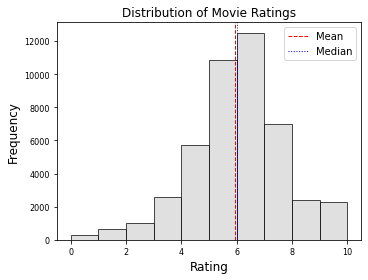

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(movie_db_cleaned['vote_average'], bins=10, color='lightgrey', edgecolor='black', alpha=0.7)
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_rate, color='blue', linestyle='dotted', linewidth=1)
plt.title('Distribution of Movie Ratings', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend({'Mean': mean_rate, 'Median': median_rate})

The ratings span in the possible range from 0.0 to 10.0.

The mean and median ratings are very close (5.93 and 6.0), showing that the distribution of movie ratings is fairly symmetrical. 

Most ratings fall within the range of 4.21 to 7.65 (mean ± standard deviation).

Significant number of movies received a rating of 6.0.

#### Average rating by genre
As a next step we use vote_average column to analyze the average rating for each genre separately. We save it into a separate df to easier visualization after.

In [29]:
# saving grouped by genre df into a new variable with a mean rating per genre calculated
mean_rate_genre = movie_db_cleaned.groupby('genres')['vote_average'].mean().reset_index()

# sorting by average rating
mean_rate_genre = mean_rate_genre.sort_values(by='vote_average')
mean_rate_genre

,genres,vote_average
10,Horror,4.847624
16,Thriller,5.354433
14,Science Fiction,5.442736
0,Action,5.578560
12,Mystery,5.730315
15,TV Movie,5.806827
4,Crime,5.852475
1,Adventure,5.930071
3,Comedy,5.942074
8,Fantasy,5.952327


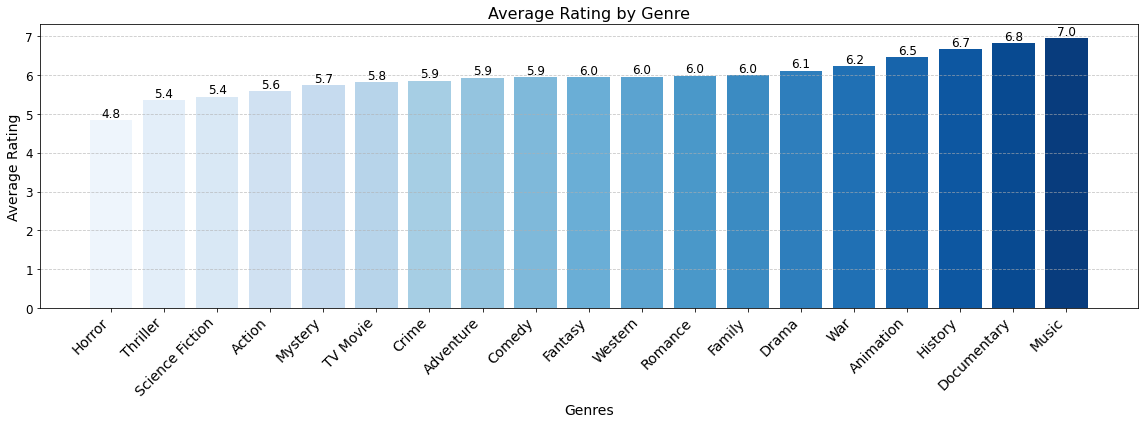

In [30]:
palette = sns.color_palette("Blues", len(mean_rate_genre))

# poltting 
plt.figure(figsize=(16, 6))
bars = plt.bar(mean_rate_genre['genres'], mean_rate_genre['vote_average'], color=palette)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating by Genre', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)

# adding a grid to background
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Lowest Rated Genre: The genre with the lowest average rating is Horror, with an average rating of 4.85.</br>

Highest Rated Genre: The genre with the highest average rating is Music, with an average rating of 6.95.</br>

Below Average Ratings: Genres such as Horror, Thriller, and Science Fiction have average ratings below 5.5</br>

Above Average Ratings: Genres like Drama, War, Animation, History, Documentary, and Music have average ratings above 6.0</br>

Moderately Rated Genres: Genres including Action, Mystery, TV Movie, Crime, Adventure, Comedy, Fantasy, Western, Romance, and Family have average ratings ranging from approximately 5.5 to 6.0

#### Popularity
In a next step we use popularity score. Popularity is a metric used by TheMovieDB to rank movies: ["You can think of popularity as being a "lifetime" popularity score that is impacted by the attributes below."](https://developer.themoviedb.org/docs/popularity-and-trending)

Attributes used to calculate popularity for movie category by TheMovieDB: number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, previous days score.

As we can see it's a complex metric that takes into account several criteria and as a result gives populairty score from 0 to 100. We rely on TheMovieDB popularity scoring because it's one of the biggest movie databases that was built with a community effort starting from 2008 with around a millions movies scored.

First lets look at popularity numbers for all movies in our data frame and their statistical characteristics:

In [31]:
std_pop = movie_db_cleaned['popularity'].std()
mean_pop = movie_db_cleaned['popularity'].mean()
median_pop = movie_db_cleaned['popularity'].median()
mode_pop = movie_db_cleaned['popularity'].mode()[0]
min_pop = movie_db_cleaned['popularity'].min()
max_pop = movie_db_cleaned['popularity'].max()

# Print the results
print(f"The mean popularity of all movies is: {mean_pop}")
print(f"The standard deviation of the movie popularity is: {std_pop}")
print(f"The median popularity of all movies is: {median_pop}")
print(f"The mode popularity of all movies is: {mode_pop}")
print(f"The minimum popularity of all movies is: {min_pop}")
print(f"The maximum popularity of all movies is: {max_pop}")

The mean popularity of all movies is: 4.119546466762209
The standard deviation of the movie popularity is: 5.260707264579266
The median popularity of all movies is: 1.9369999999999998
The mode popularity of all movies is: 0.6
The minimum popularity of all movies is: 0.6
The maximum popularity of all movies is: 80.773


Lets do visialization of the numbers above:

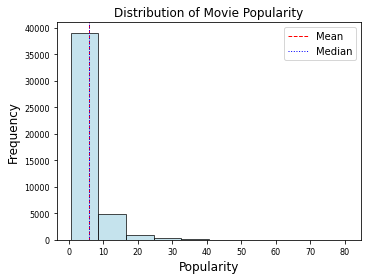

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(movie_db_cleaned['popularity'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_rate, color='blue', linestyle='dotted', linewidth=1)
plt.title('Distribution of Movie Popularity', fontsize=12)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend({'Mean': mean_rate, 'Median': median_rate})

Range of popularity score is 0 to 100.

With a mean popularity of approximately 4.12, we see that on average movies tend to have very low level of popularity.

The median popularity of approximately 1.94, which is lower than the mean, it means that more than half of the movies have a popularity score below the average. This suggests a skewed distribution.

The range between the minimum popularity score of 0.6 and the maximum score of 80.773 demonstrates a significant disparity between the least and most popular movies.

#### Average popularity by genre
As a next step we use popularity column to analyze the average popularity for each genre separately. We save it into a separate df to easier visualization after.

In [33]:
# saving grouped by genre df into a new variable with a mean popularity score per genre calculated
mean_pop_genre = movie_db_cleaned.groupby('genres')['popularity'].mean().reset_index()
mean_pop_genre = mean_pop_genre.sort_values(by='popularity')
mean_pop_genre

,genres,popularity
5,Documentary,1.348202
11,Music,2.023713
15,TV Movie,2.703941
10,Horror,3.245644
3,Comedy,3.863435
6,Drama,3.978203
18,Western,4.162166
13,Romance,4.162464
9,History,4.425600
2,Animation,4.584240


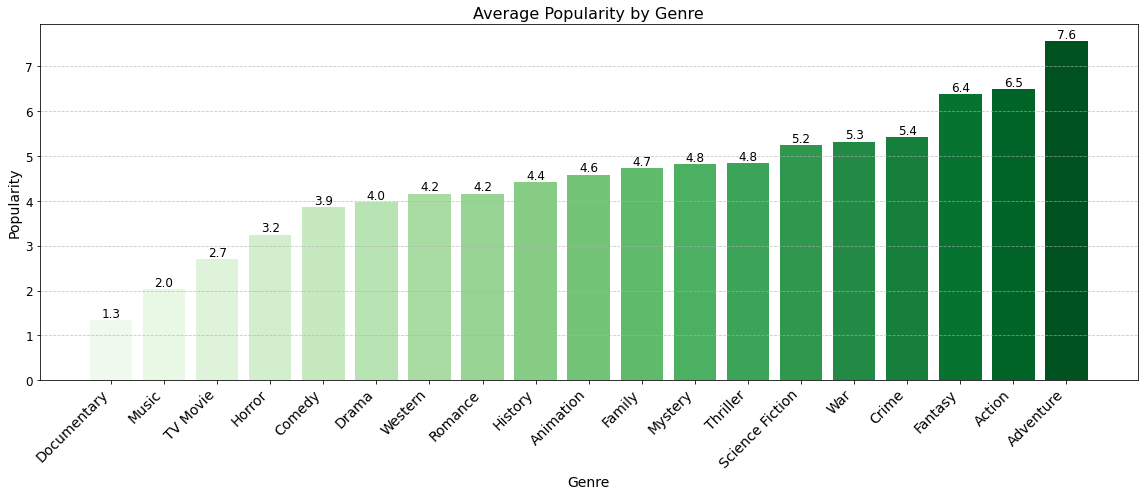

In [34]:
palette = sns.color_palette("Greens", len(mean_pop_genre))

plt.figure(figsize=(16, 7))
bars = plt.bar(mean_pop_genre['genres'], mean_pop_genre['popularity'], color=palette)

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Average Popularity by Genre', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)

# adding a grid to background
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adding values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

The average popularity scores by genre range from 1.35 to 7.56

Documentary, Music, and TV Movie are the least popular genres with average popularity scores of 1.35, 2.02, and 2.70.

Horror, Comedy, and Drama fall into the middle range with average popularity scores between 3.25 and 3.98.

Western, Romance, History, Animation, Family, Mystery, Thriller, Science Fiction, War, and Crime have higher popularity scores, ranging from 4.16 to 5.42.

Fantasy, Action, and Adventure are the top three most popular genres with average popularity scores of 6.39, 6.50, and 7.56. These genres are significantly more popular compared to others which indicates a strong preference among audience.

This insight can help filmmakers and distributors focus their efforts on genres that are more likely to attract larger audiences.

Lets do another visualization for average popularity be genre using seaborn.

The black sticks in each bar in the barplot represent the error bars. By default seaborn’s barplot function displays error bars that represent the 95% confidence interval of the mean.

This shows the range within which the true mean popularity value is likely to fall. The length of the error bars shows the precision of the mean estimate: shorter bars mean higher precision, while longer bars suggest more variability and less precision.

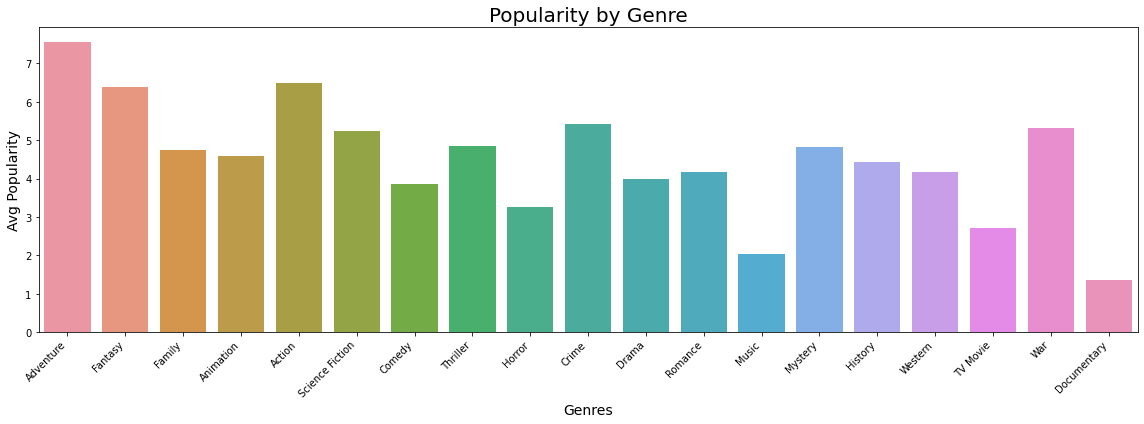

In [54]:
# plotting average popularity be genre with seaborn barplot
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(x = 'genres', y = 'popularity', data = movie_db_cleaned, ax = ax, ci = None)
ax.set_title('Popularity by Genre', fontsize=20)
ax.set_ylabel('Avg Popularity', fontsize=14)
ax.set_xlabel('Genres', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()
plt.show()

We merge last two dataframes so we can look at their combined visualization.

In [36]:
# merging mean rating and mean popularity dataframes
df_genre = pd.merge(mean_rate_genre, mean_pop_genre, on='genres', how='inner')
df_genre = df_genre.sort_values(by='popularity')

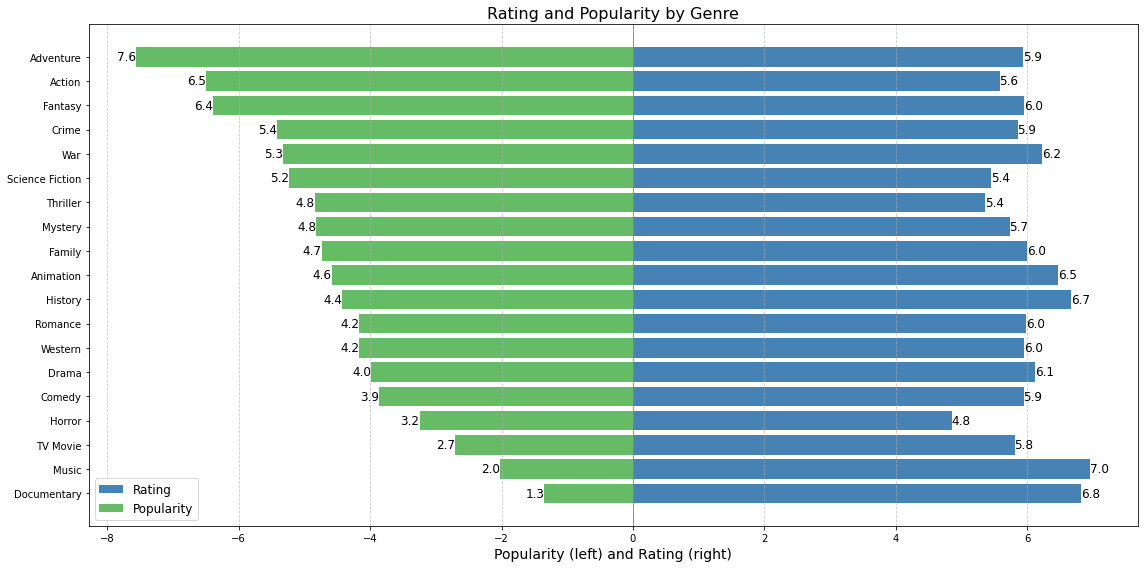

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))

# plotting ratings
bars_rating = ax.barh(df_genre['genres'], df_genre['vote_average'], color='#4682B4', label='Rating')

# plotting popularity 
bars_popularity = ax.barh(df_genre['genres'], -df_genre['popularity'], color='#66BB66', label='Popularity')

# ddding a vertical line between
plt.axvline(x=0, color='gray', linewidth=0.8)


plt.xlabel('Popularity (left) and Rating (right)', fontsize=14)
plt.title('Rating and Popularity by Genre', fontsize=16)

plt.legend(loc='lower left', fontsize=12)
ax.grid(which='major', axis='x', linestyle='--', alpha=0.7)

# adding values for ratings
for bar in bars_rating:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', ha='left', va='center', fontsize=12, color='black')

# adding values for popularity
for bar in bars_popularity:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{-width:.1f}', ha='right', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


On this plot we can see comparative visualization if the average rating and average popularity of all genres. Some conclusions we can make:

High Popularity and Moderate Ratings: Adventure, Action, and Fantasy
Moderately Rated and Popular: Comedy, Horror, and Drama
Highly Rated but Less Popular: Documentary, Music

We conclude that higher rating doesn't mean success among viewers. We assume that Documentary and Music movies attract certain limited audience that have more clear expectation of what they are about to see. 

Some genres like adventure and action might attract largest audiences, but they might receive moderate ratings. Filmmakers and marketers can use this information to balance between creating critically acclaimed movies and those that appeal to a broader audience.

For our business initiative we belive popularity is a more important criteria, as it indicates overall succes of the movie. We do further analysis to make recommendation using average popularity of genres.

Here is another visualization to support this conclusions:

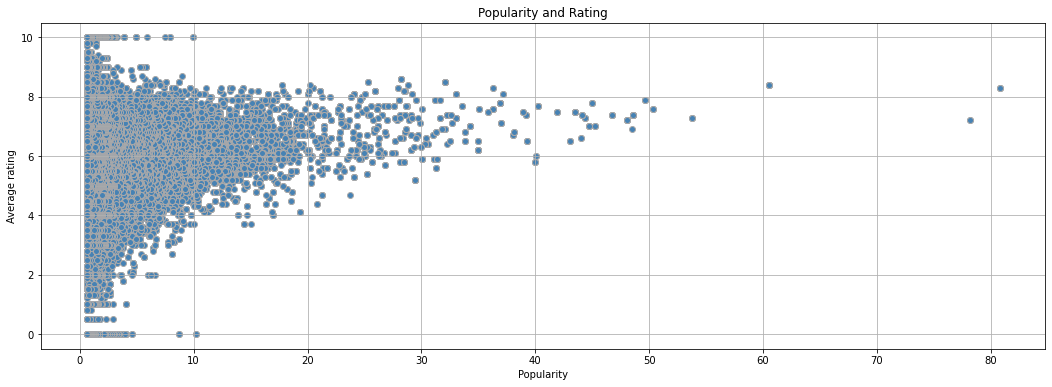

In [38]:
# making scatter pot to see distribution of popularity and rating
plt.figure(figsize=(18, 6))
plt.scatter(movie_db_cleaned['popularity'], movie_db_cleaned['vote_average'], color='#4682B4', edgecolors='darkgrey')
plt.title('Popularity and Rating')
plt.xlabel('Popularity')
plt.ylabel('Average rating')
plt.grid(True)
plt.show()

As a result of popularity analysis we recommend following three genres:

#### Action

**Description:** Action films are characterized by a lot of physical activity, including fights, chases, explosions, and stunts. They often have fast-paced sequences and high energy scenes.<br>
**Distinguishing Features:** Intense sequences of physical feats, a focus on heroism, conflict resolution through combat, and often a race against time.<br>
**Examples:** Mad Max: Fury Road, John Wick, Terminator.

#### Adventure

**Description:** Adventure films revolve around exciting and unusual experiences. These movies often take place in exotic or dangerous locations, focusing on a journey or quest.<br>
**Distinguishing Features:** Epic journeys, explorations of new or exotic locales, a sense of discovery, and often a protagonist facing various challenges or obstacles.<br>
**Examples:** Pirates of the Caribbean, Indiana Jones, Jurassic Park.

#### Fantasy

**Description:** Fantasy films involve magical or supernatural elements that do not exist in the real world. They often take place in fictional universes with unique rules and creatures.<br>
**Distinguishing Features:** Presence of magic, mythical creatures, and fantastical worlds, often involving a battle between good and evil, with heroes undertaking quests or missions.<br>
**Examples:** Harry Potter and the Sorcerer's Stone, The Lord of the Rings, The Chronicles of Narnia.

### Best time to release 

We will try to indentify the best time to release a movie as its crucial for maximizing movie's success and popularity. Timing affects a movie's visibility, competition, and audience availability.

First bellow we analyize average popularity of all movies by a month they were relaesed in. We can see that December and July stand out, we assume summer and Christmas holidays can attract larger audiences as more people have free time to visit theaters and prefer to do activities outside of home.

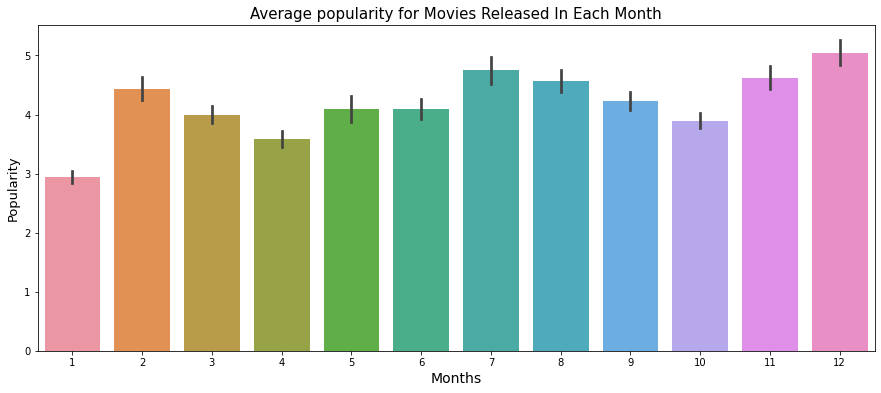

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=movie_db_cleaned, x= 'release_month', y='popularity')
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Movies Released In Each Month', fontsize=15);

### Top Popular Genres - Adventure, Action, Fantasy - Release months

Lets look at the best time to release for three of the most popular genres that we recommended.

Adventure movies - November and December  
Action movies - May, July, December  
Fantasy movies - November and December

In [40]:
adventure = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Adventure']
action = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Action']
fantasy = movie_db_cleaned[movie_db_cleaned['genres'] ==  'Fantasy']

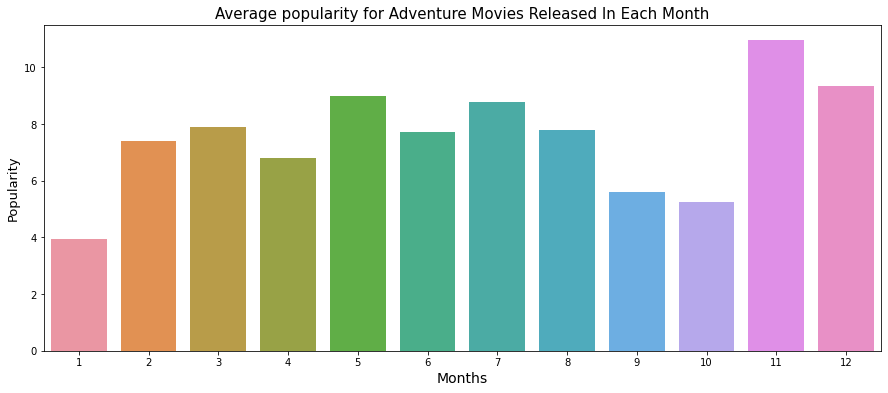

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=adventure, x= 'release_month', y='popularity', ci=None)
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Adventure Movies Released In Each Month', fontsize=15);

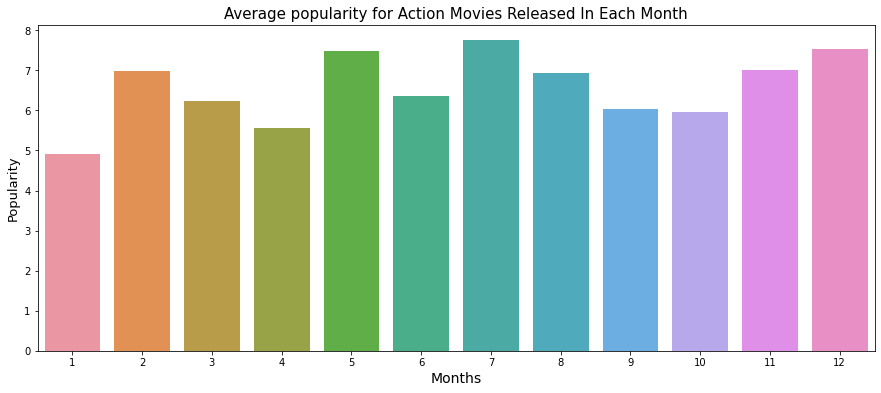

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=action, x= 'release_month', y='popularity', ci=None)
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Action Movies Released In Each Month', fontsize=15);

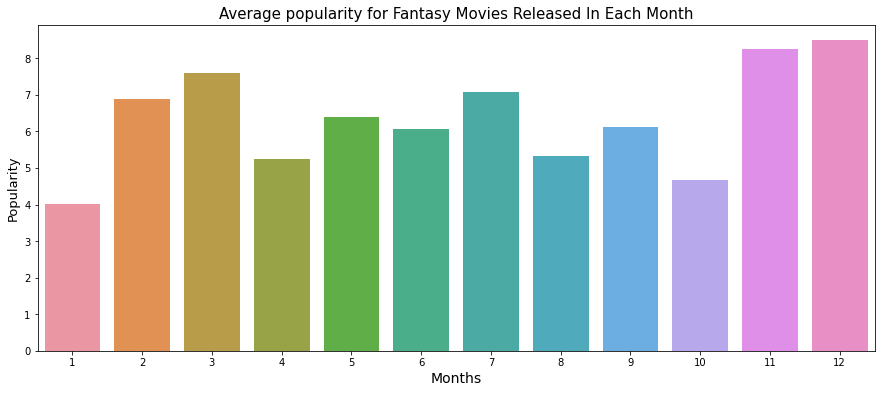

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=fantasy, x= 'release_month', y='popularity', ci=None)
ax.set_ylabel('Popularity', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average popularity for Fantasy Movies Released In Each Month', fontsize=15);

### Top Popular Genres - Adventure, Action, Fantasy - Directors

Director of a movie plays an important role in shaping the vision and execution of a movie, it is crucial to find the right professional. They are responsible for all major decision on movie's style, tone and aesthetic and they ensure that all elements align with the intended vision. They work with the crew, are resposible for quality of the final product and importanlty director's reputation and previous work can also influence audience expectations and box office performance. Selecting the right director is essential for fullfilling the movie's potential and achieving success.

Let's look at the most popular directors in the chosen three genres. For this part we extract directors from the IMDB dataset using SQL.

In [44]:
conn = sqlite3.connect('temp/im.db')

imdb_dir = pd.read_sql(
    """
    SELECT  mb.primary_title AS movie, 
            mb.start_year, 
            mb.runtime_minutes, 
            mb.genres,
            d.person_id,
            p.primary_name
    FROM movie_basics AS mb
    JOIN directors AS d
    USING(movie_id)
    JOIN persons AS p
    USING(person_id)
    GROUP BY movie_id
    
    """
, conn
)


In [45]:
imdb_dir

,movie,start_year,runtime_minutes,genres,person_id,primary_name
0,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul
2,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,Raoul Ruiz
...,...,...,...,...,...,...
140411,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,Azhar Kinoi Lubis
140412,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272490,Angela Gurgel
140413,Dankyavar Danka,2013,NaN,Comedy,nm7764440,Kanchan Nayak
140414,6 Gunn,2017,116.0,None,nm10538612,Kiran Gawade


We have created a df with directors and now we merge it based on movie title with movie_db_cleaned, that has popularity column. As a result we have a df with 41785 rows. Now we detect most popular directors for each of three selected genres.

In [46]:
# merging two df with directors and popularity
pop_directors = pd.merge(movie_db_cleaned, imdb_dir, on='movie', how='inner')

In [47]:
# extracting directors of three selected genres
dir_adventure = pop_directors[pop_directors['genres_x'] == 'Adventure']
dir_action = pop_directors[pop_directors['genres_x'] == 'Action']
dir_fantasy = pop_directors[pop_directors['genres_x'] == 'Fantasy']

In [48]:
# we group the df by director name and calculate their mean popularity score
dir_adventure = dir_adventure.groupby('primary_name')['popularity'].mean().reset_index()
dir_adventure = dir_adventure.sort_values(by='popularity', ascending=False)
dir_adventure = dir_adventure.head(5)

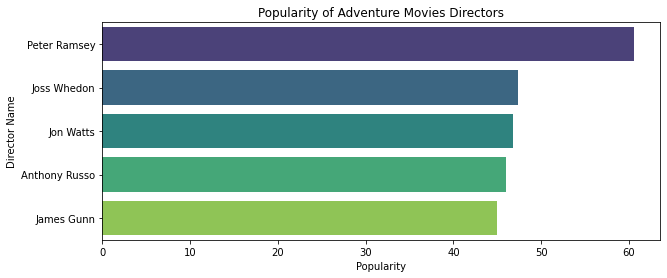

In [49]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_adventure, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Adventure Movies Directors')
plt.show()

In [50]:
# we group the df by director name and calculate their mean popularity score
dir_action = dir_action.groupby('primary_name')['popularity'].median().reset_index()
dir_action = dir_action.sort_values(by='popularity', ascending=False)
dir_action = dir_action.head(5)

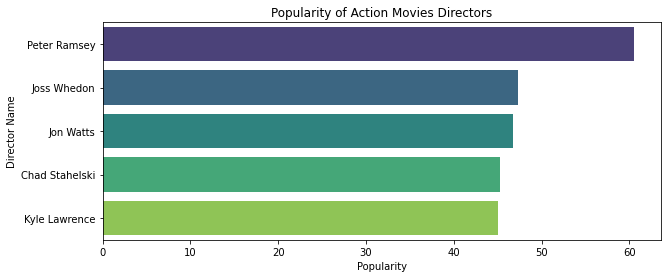

In [51]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_action, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Action Movies Directors')
plt.show()

In [52]:
# we group the df by director name and calculate their mean popularity score
dir_fantasy = dir_fantasy.groupby('primary_name')['popularity'].median().reset_index()
dir_fantasy = dir_fantasy.sort_values(by='popularity', ascending=False)
dir_fantasy = dir_fantasy.head(5)

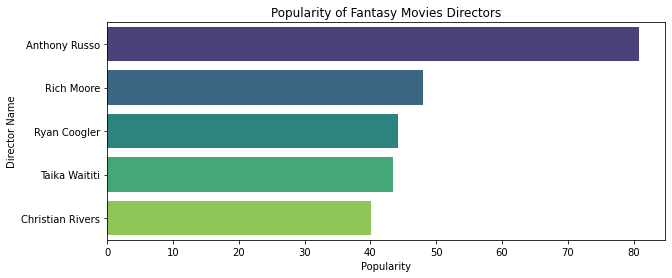

In [53]:
plt.figure(figsize=(10, 4))
sns.barplot(x='popularity', y='primary_name', data=dir_fantasy, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.title('Popularity of Fantasy Movies Directors')
plt.show()

Suggested Directors for Adventure movies : Peter Ramsey, Joss Whedon, Jon Watts
    
Suggested Directors for Action movies: Peter Ramsey, Joss Whedon, Jon Watts
    
Suggested Directors for Fantasy movies: Anthony Russo, Rich Moore, Ryan Coogler

List of directors for adventure and action is the same, bacause thos two genres often go together as a subgenre of each other. For example one of Peter Ramsey's most famous works is Spider-Man: Into the Spider-Verse, which has Animation, Action and Adventure genres tagged on IMDB.

## Conclusions

* Adventure - Peter Ramsey, Joss Whedon, Jon Watts. Release: November, December
* Action - Peter Ramsey, Joss Whedon, Jon Watts. Release: July, December
* Fantasy - Anthony Russo, Rich Moore, Ryan Coogler. Release: Novermber, December

## Next Steps

For further steps we recommend expanding analysis into several directions:

* Explore data on profits and movie perfomance on streaming services.

* Add budgets spent on marketing. ["Many people get confused when they hear that a movie with a production budget of 100 million grosses 150 million worldwide and loses money. But the brutal fact is that movies get sunk by the massive costs of marketing and distribution all the time."](https://www.studiobinder.com/blog/production-budget/)
* Explore global trends in genres